In [1]:
import gc
import glob

import tqdm
import torch
import numpy as np

In [2]:
paths = glob.glob("../logs/ss_3e-4/record_*.npz")

In [3]:
tensors = []
size = 0.0
for f in (p := tqdm.tqdm(paths, desc="0.00 GB")):
    arr = np.load(f)["obs"][:, :, :120, :]
    tsr = torch.from_numpy(arr)
    size += tsr.nbytes / (1024 ** 3)
    p.set_description(f"{size:5.2f} GB")
    tensors.append(tsr)
    del arr, tsr

0.00 GB:   0%|          | 0/4 [00:00<?, ?it/s]

28.27 GB: 100%|██████████| 4/4 [01:37<00:00, 24.50s/it]


In [4]:
t = torch.concatenate(tensors, dim=0)

In [5]:
del tensors
gc.collect()

53

In [6]:
torch.save(t, "../models/SSDataset.pt", pickle_protocol=5)

In [1]:

arr: np.ndarray = np.load("../logs/ss_3e-4/record_0.npz")["obs"]

In [2]:
arr.shape

(61767, 4, 144, 256)

In [ ]:
x = arr[:, 3, :, :].sum(axis=0)

69563 10.010505108648726
0.00010000116852616266


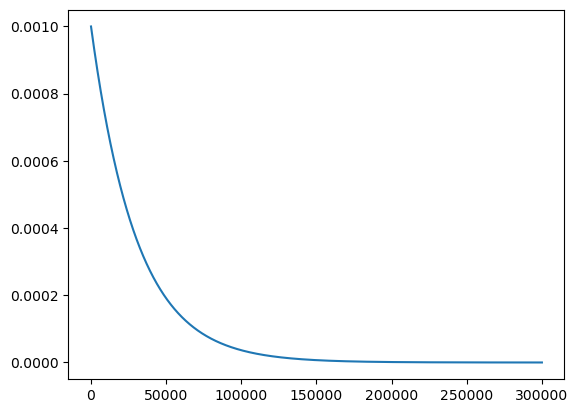

In [132]:
import numpy as np
import matplotlib.pyplot as plt
n = 300000
# 0.999989
y = 1e-3 * np.cumprod([0.9999669] * n)
plt.plot(np.arange(0, n), y)
for i in range(n):
    if y[i] <= 1e-4:
        print(i, i / 6949)
        break
print(y[i-1])

In [16]:
y[88]

1.0408804957535736e-05

In [9]:
for i in range(100, 200):
    if (1e-4 * np.cumprod([0.98] * 300))[i] <= 1e-5:
        print(i)
        break

113


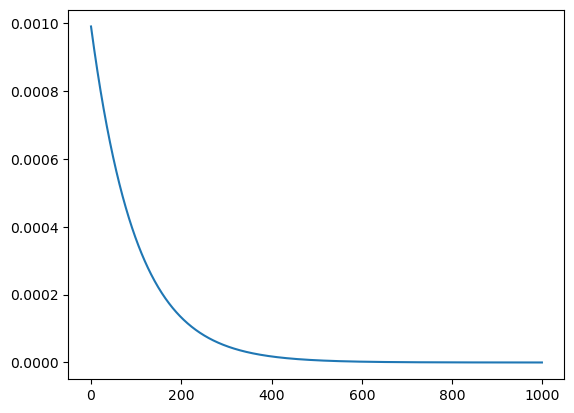

In [9]:
np.argmin(1e-3 * np.cumprod([0.99] * 1000) >= 1e-5)

458

In [ ]:
(1e-3 * np.cumprod([0.99] * 1000))[220]

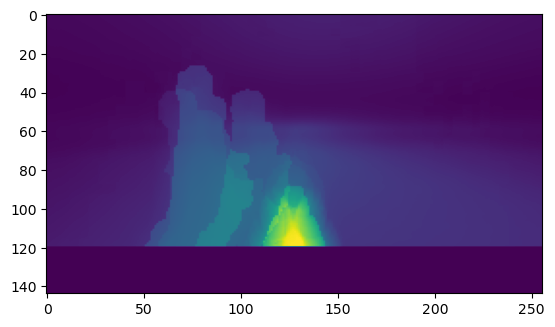

In [12]:
plt.imshow(x)

In [17]:
y = x.sum(axis=1)
y.argsort()

array([143, 140, 139, 138, 137, 136, 135, 134, 133, 132, 141, 131, 129,
       128, 127, 126, 125, 124, 123, 142, 122, 130, 121, 120,  38,  37,
        36,  39,  35,  26,  34,  33,  25,  29,  28,  32,  27,  31,  30,
        24,  40,  23,  22,  41,  21,  42,  20,  43,  19,  18,  44,  17,
        45,  16,  46,  15,  14,  47,  13,  12,  48,  11,  10,  49,   9,
         8,   7,   6,  50,   5,   4,   3,   2,  51,   1,   0,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119], dtype=int64)

In [20]:
y[:120]

array([163794860, 162109040, 159538180, 157098560, 154614980, 152106380,
       149836820, 148202780, 145185220, 142563240, 139898020, 137217020,
       135496080, 132179440, 129470280, 126608380, 123839520, 121014480,
       118705660, 115253280, 112094300, 108993280, 104758500, 101351220,
        98359200,  94789400,  91115640,  96925240,  96253580,  94806300,
        97783320,  97484580,  96292640,  93827660,  91549040,  90866080,
        88055500,  87808120,  87097320,  90106520, 100608200, 106593720,
       109968200, 114371900, 119778260, 121846320, 126084600, 131071100,
       136094800, 141622840, 151685400, 159635620, 169563280, 182566940,
       196385220, 209242720, 229863460, 248493300, 264335640, 274165720,
       280048840, 280550600, 281737840, 285765660, 292609480, 302955480,
       316298940, 330593180, 345305720, 360668160, 375666640, 390057860,
       408466480, 424296260, 433750420, 441801100, 450642900, 455592260,
       460477300, 466595740, 473581800, 480937660, 

In [21]:
arr.shape

(61767, 4, 144, 256)